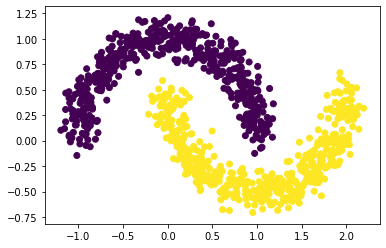

In [31]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X, y = make_moons(n_samples=1000, random_state = 18, noise=0.1)
plt.scatter(X[:,0], X[:,1], c = y)



In [32]:
y = y.reshape(-1,1)


In [33]:
def nonlin(x,deriv=False): #создание сигмоиды; в соответств от 0 до 1; преобр в вероятности;   deriv = True - производная
    if(deriv==True):
        return x*(1-(x))

    return 1/(1+np.exp(-x))
    
#X входной набор данных 

                
#y выходной набор данных
#l0 первый слой сети
#l1 -l2 - скрытые слои сети 
# l3 -финальный слой - гипотеза
#syn - слои весов
# l2_error – промах сети в количественном выражении
# l2_delta – ошибка сети, в зависимости от уверенности предсказания. Почти совпадает с ошибкой, за исключением уверенных предсказаний
# l1_error – взвешивая l2_delta весами из syn1, мы подсчитываем ошибку в среднем/скрытом слое
# l1_delta – ошибки сети из l1, масштабируемые по увеернности предсказаний. Почти совпадает с l1_error, за исключением уверенных предсказаний
np.random.seed(1) #каждый раз одно и то же случайное распределение

# случайно инициализируем веса, в среднем - 0; «synapse zero» 
syn0 = 2*np.random.random((X.shape[1],4)) - 1 #задаем веса и размер слоёв случайно;  матрица весов сети
syn1 = 2*np.random.random((4,3)) - 1 
syn2 = 2*np.random.random((3,1)) - 1

lr = 0.1
for j in range(10000):
# проходим вперёд по слоям 0, 1 и 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) 
    l2 = nonlin(np.dot(l1,syn1))
    l3 = nonlin(np.dot(l2,syn2))
    # в какую сторону нужно двигаться?
    # если мы были уверены в предсказании, то сильно менять его не надо
    l3_error = y - l3 # в l1  догадки, сравниваем с реальностью, . l_error – вектор из положительных и отрицательных чисел, характеризующий «промах» сети.
    l3_delta = l3_error*nonlin(l3,deriv=True) #производная, взвешенная по ошибкам; уменьшаем ошибки предсказаний, сделанных с высокой уверенностью
    l2_error = l3_delta.dot(syn2.T)
    l2_delta = l2_error*nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T) #Использует ошибки, взвешенные по уверенности предсказаний из l2, чтобы подсчитать ошибку для l1; обратное распространение ошибок
    l1_delta = l1_error * nonlin(l1,deriv=True)
   
    syn0 += lr*l0.T.dot(l1_delta) 
    syn1 += lr*l1.T.dot(l2_delta) 
    syn2 += lr*l2.T.dot(l3_delta)
    

# ВЫВОДЫ:
    Таким образом, вес первого входа по отношению к выходу будет постоянно увеличиваться или оставаться постоянным, а два других веса будут увеличиваться и уменьшаться в зависимости от примеров. Этот эффект и способствует обучению сети на основе корреляций входных и выходных данных.

In [34]:
 y.shape

(1000, 1)

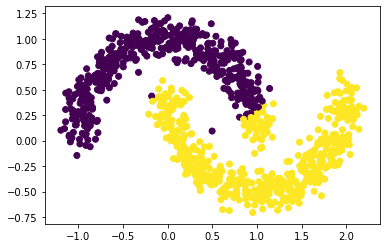

In [35]:
plt.scatter(X[:,0], X[:,1], c = np.round(l3.T.squeeze()))

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y,np.round(l3.T.squeeze()))

0.954